In [1]:
import sys
sys.path.append("../")
import numpy as np
import matplotlib.pyplot as plt
import scripts.theodolite_utils as theodo_u
import scripts.theodolite_plot_function as theodo_p
import scripts.groundtruth_utils as theodo_g
from numpy import linalg
import importlib
theodo_u = importlib.reload(theodo_u)
theodo_p = importlib.reload(theodo_p)

In [2]:
theodo_u = importlib.reload(theodo_u)

# file_0 = "/media/william/will_SSD/Theodolite_data/IROS_data/simulated_data_for_figure/model_MC_0_0_0_0_0.csv"
# file_1 = "/media/william/will_SSD/Theodolite_data/IROS_data/simulated_data_for_figure/model_MC_1_0_0_0_0.csv"
# file_2 = "/media/william/will_SSD/Theodolite_data/IROS_data/simulated_data_for_figure/model_MC_0_1_0_0_0.csv"
# file_3 = "/media/william/will_SSD/Theodolite_data/IROS_data/simulated_data_for_figure/model_MC_0_0_1_0_0.csv"
# file_4 = "/media/william/will_SSD/Theodolite_data/IROS_data/simulated_data_for_figure/model_MC_0_0_0_1_0.csv"
# file_5 = "/media/william/will_SSD/Theodolite_data/IROS_data/simulated_data_for_figure/model_MC_1_1_1_1_0.csv"
file_0 = "/home/maxime/model_MC_0_0_0_0_0.csv"
file_1 = "/home/maxime/model_MC_1_0_0_0_0.csv"
file_2 = "/home/maxime/model_MC_0_1_0_0_0.csv"
file_3 = "/home/maxime/model_MC_0_0_1_0_0.csv"
file_4 = "/home/maxime/model_MC_0_0_0_1_0.csv"
file_5 = "/home/maxime/model_MC_1_1_1_1_0.csv"

Data_no_uncertainty = theodo_u.read_point_uncertainty_with_raw_data_csv_file(file_0)
Data_tilt = theodo_u.read_point_uncertainty_with_raw_data_csv_file(file_1)
Data_atmospheric = theodo_u.read_point_uncertainty_with_raw_data_csv_file(file_2)
Data_extrinsic_calibration = theodo_u.read_point_uncertainty_with_raw_data_csv_file(file_3)
Data_time_synchronization = theodo_u.read_point_uncertainty_with_raw_data_csv_file(file_4)
Data_all_uncertainty = theodo_u.read_point_uncertainty_with_raw_data_csv_file(file_5)

In [3]:
theodo_g = importlib.reload(theodo_g)

Data_total = [Data_no_uncertainty, Data_tilt, Data_atmospheric, Data_extrinsic_calibration, Data_time_synchronization, Data_all_uncertainty]
## Frobenius norm for all data according to the model chosen and the range linked
Parameter_RTS_total = []    # Here the parameters linked to the metric (range for instance)
Distance_F_total = []
Number_model = 1
for model in Data_total:
    print(Number_model)
    Number_model=Number_model+1
    Distance_F = []
    Parameter_RTS = []
    for value_model in model:
        Distance_F.append(np.sqrt(theodo_u.Frobenius_norm(value_model[2], np.zeros((3,3)))))
        Parameter_RTS.append(value_model[3][0])
    Distance_F_total.append(Distance_F)
    Parameter_RTS_total.append(Parameter_RTS)

1
2
3
4
5
6


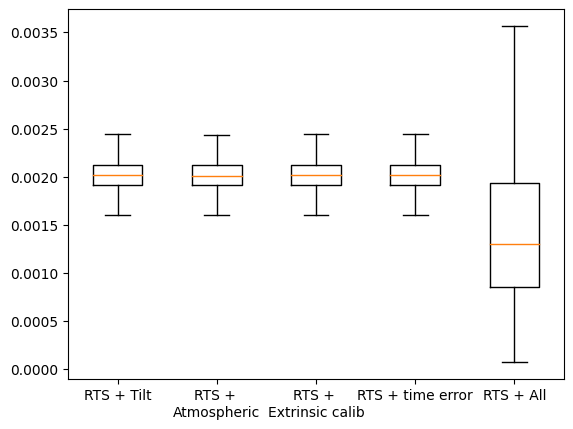

In [4]:
data = Distance_F_total
fig, ax = plt.subplots()
ax.boxplot(data, showfliers=False, notch=False)
ax.set_xticklabels(['Instrument','Tilt', 'Atmospheric', 'Extrinsic calib', 'Time error', 'All'])
#ax.set_xticklabels(['RTS + \nExtrinsic calib', 'RTS + All'])
plt.show()

In [ ]:
theodo_g = importlib.reload(theodo_g)

## Sort results according to the range of measurements
Distance_F_total_sorted = []
for i,j in zip(Distance_F_total, Parameter_RTS_total):
    Dist_0_25 = []
    Dist_25_75 = []
    Dist_75_125 = []
    Dist_125_200 = []
    Dist_200 = []
    for k,l in zip(i,j):
        if 0 <= l < 25:                 # Between 0 and 25m
            Dist_0_25.append(k*1000)
        if 25 <= l < 75:                # Between 25 and 75m
            Dist_25_75.append(k*1000)
        if 75 <= l < 125:               # Between 75 and 125m
            Dist_75_125.append(k*1000)
        if 125 <= l < 200:              # Between 125 and 200m
            Dist_125_200.append(k*1000)
        if 200 <= l:                    # Between 200 and more
            Dist_200.append(k*1000)
    Distance_F_total_sorted.append([Dist_0_25, Dist_25_75, Dist_75_125, Dist_125_200, Dist_200])

In [ ]:
data = []
for i in Distance_F_total_sorted:
    for j in i:
        data.append(j)
max_value = np.max(data[-1])

fig, ax = plt.subplots()
box = ax.boxplot(data, showfliers=False, notch=False, patch_artist=True)

plt.xticks(ticks=[3, 8, 13, 18, 23], labels=['RTS + Tilt', 'RTS + \nAtmospheric', 'RTS + \nExtrinsic calib', 'RTS + \nTime synch', 'RTS + All'])

colors = ['cyan', 'lightblue', 'lightgreen', 'tan', 'pink',
          'cyan', 'lightblue', 'lightgreen', 'tan', 'pink',
          'cyan', 'lightblue', 'lightgreen', 'tan', 'pink',
          'cyan', 'lightblue', 'lightgreen', 'tan', 'pink',
          'cyan', 'lightblue', 'lightgreen', 'tan', 'pink']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.axvline(x=5.5, linestyle='dashed', color="black")
plt.axvline(x=10.5, linestyle='dashed', color="black")
plt.axvline(x=15.5, linestyle='dashed', color="black")
plt.axvline(x=20.5, linestyle='dashed', color="black")

ax.set_xlabel("\nCorrection used as comparison")
ax.set_ylabel("Square Frobenius norm [mm]")
#ax.set_yscale('log')
ax.legend(handles=[box["boxes"][0], box["boxes"][1], box["boxes"][2], box["boxes"][3], box["boxes"][4]],
          labels =['0 to 25m', '25 to 75m', '75 to 125m', '125 to 200m', 'More than 200m'],
          loc='upper center', bbox_to_anchor=(0.5, 1.18), ncol=3)
plt.tight_layout()
#plt.savefig("../figs/uncertainty/Frobenius_norm.png", bbox_inches="tight")
plt.show()

In [ ]:
distance_and_frobenius_array = np.array([list(zip(Distance_F_total[4], Parameter_RTS_total[0]))]).T
plt.plot(Parameter_RTS_total[0], Distance_F_total[1])
plt.show